# Histogram
The PDF is piecewise constant while the CDF is piecewise linear. Random samples,e.g. for Monte Carlo methods, can be drawn from a histogram distributionby selecting a bin at random (with probabilities proportional to the numbersof points in the bins) and drawing from an uniform distribution with theextentof that bin.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import netCDF4 as nc
from scipy import stats

In [2]:
ds = nc.Dataset('../../Data/Weather/day20_850_temp.nc')

In [3]:
cnrm = data=ds['cnrm'][0]
print(cnrm.shape)

(9, 73, 144)


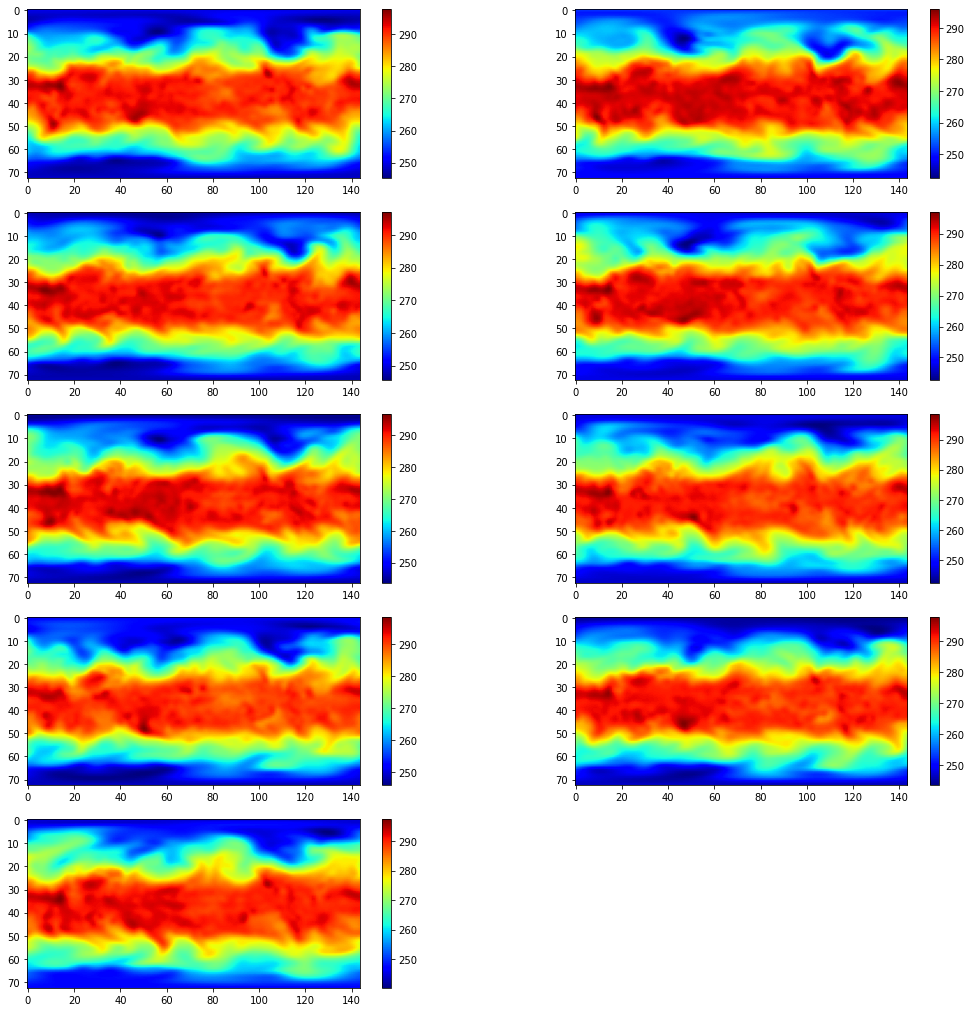

In [4]:
plt.figure(figsize=(18,6*3))
for i in range(cnrm.shape[0]):
    plt.subplot(np.int32(np.ceil(cnrm.shape[0]/2.)),2,i+1)
    plt.imshow(cnrm[i,:,:], cmap='jet')
    plt.colorbar()
plt.show()

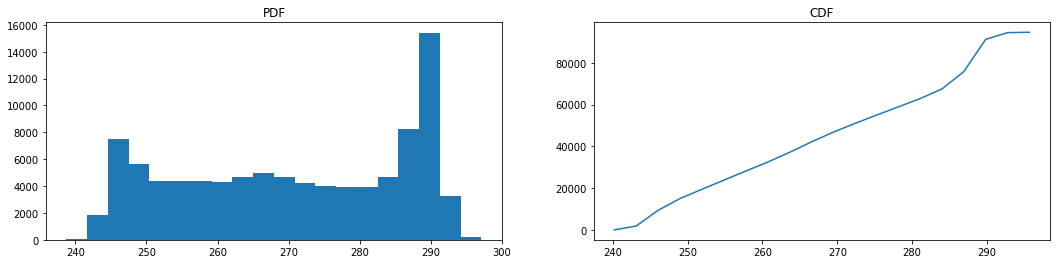

In [8]:
hist, bins = np.histogram(cnrm.flatten(), bins=20)

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title('PDF')
plt.bar(bins[0:-1], hist, width=np.diff(bins))

plt.subplot(1,2,2)
plt.title('CDF')
plt.plot(bins[0:-1], np.cumsum(hist))

plt.show()